# Clasificación de la calidad del vino



In [13]:
!pip install imbalanced-learn
# ╔═ Paso 0: Imports ════════════════════════════════════════════════════
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
# Celda 1: Instalar imbalanced-learn


**Justificación:**  
- **pandas** para lectura y manipulación de tablas.  
- **numpy** para operaciones numéricas.  
- **matplotlib** para visualizaciones exploratorias.  
- **scikit-learn** para todo el flujo de ML: preprocesamiento, partición, modelado y evaluación.  


In [4]:
# ╔═ Paso 1: Carga de datos ═════════════════════════════════════════════
# Cargamos localmente el CSV separado por punto y coma
df = pd.read_csv("winequality-red.csv", sep=';')
print(f"Shape inicial: {df.shape}")
df.head()

Shape inicial: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Leemos directamente `winequality-red.csv`, que contiene 1 599 muestras y 12 columnas (11 atributos fisicoquímicos + `quality`) .ar


**Justificación:**  
- Eliminamos duplicados para evitar sesgos por registros repetidos.  
- Convertimos a clasificación binaria porque nos interesa diferenciar vinos “buenos” vs “no buenos” según el umbral Quality ≥ 7 .


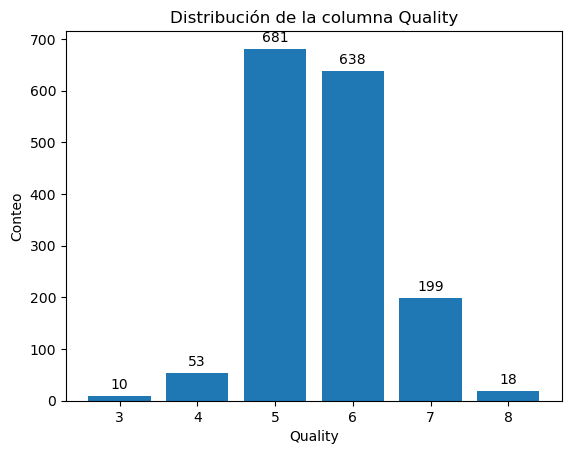

In [7]:
# Contar ocurrencias de cada valor de 'quality'
counts = df['quality'].value_counts().sort_index()

# Crear figura y barras
plt.figure()
bars = plt.bar(counts.index, counts.values)
plt.xlabel('Quality')
plt.ylabel('Conteo')
plt.title('Distribución de la columna Quality')

# Añadir etiqueta encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f'{height}',                          # texto a mostrar
        xy=(bar.get_x() + bar.get_width()/2, height),    # punto (x,y) de la anotación
        xytext=(0, 3),                        # desplazamiento en puntos (x_offset, y_offset)
        textcoords="offset points",          
        ha='center',                         # alineación horizontal
        va='bottom'                          # alineación vertical
    )

plt.show()

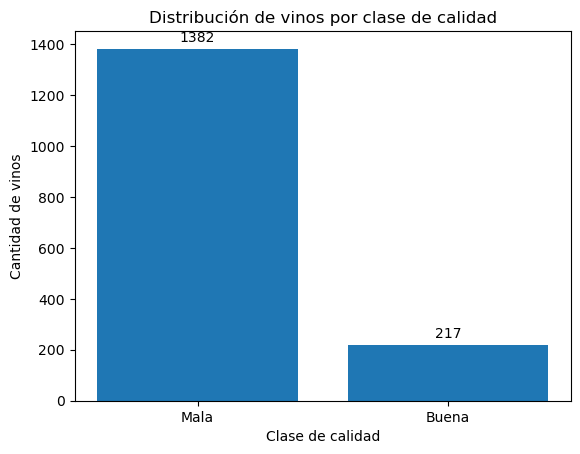

In [8]:
df['quality_label'] = df['quality'].apply(lambda q: 'Buena' if q >= 7 else 'Mala')

# 2. Contar cada clase
counts = df['quality_label'].value_counts().reindex(['Mala','Buena'])

# 3. Graficar barras con anotaciones
plt.figure()
bars = plt.bar(counts.index, counts.values)
for bar in bars:
    h = bar.get_height()
    plt.annotate(
        f'{h}',
        xy=(bar.get_x() + bar.get_width()/2, h),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom'
    )
plt.xlabel('Clase de calidad')
plt.ylabel('Cantidad de vinos')
plt.title('Distribución de vinos por clase de calidad')
plt.show()

De la visualización anterior podemos observar que el conjunto de datos está sesgado o desequilibrado.

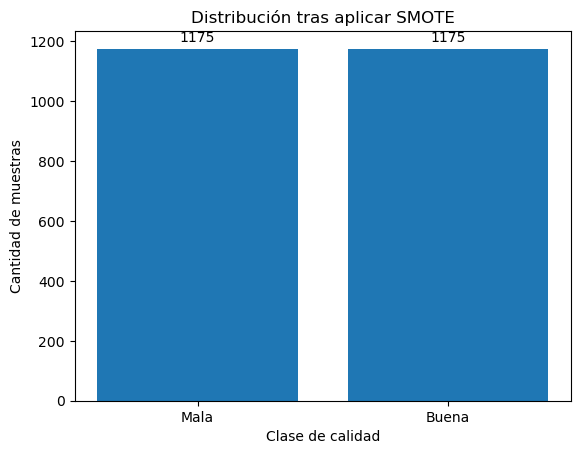

In [15]:
# ╔═ Paso 2: Remuestreo con SMOTE ════════════════════════════════════════
# 2.1 Eliminar duplicados y crear etiqueta numérica
df = df.drop_duplicates().reset_index(drop=True)
df['quality_label_num'] = (df['quality'] >= 7).astype(int)

# 2.2 Seleccionar características y escalar
X = df.drop(['quality', 'quality_label', 'quality_label_num'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2.3 Aplicar SMOTE solo sobre el set completo (o bien sobre X_train si ya dividiste)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, df['quality_label_num'])

# 2.4 Graficar distribución tras SMOTE
res_counts = pd.Series(y_res).value_counts().reindex([0,1])
plt.figure()
bars = plt.bar(['Mala','Buena'], res_counts.values)
for bar in bars:
    h = bar.get_height()
    plt.annotate(
        f'{h}',
        xy=(bar.get_x() + bar.get_width()/2, h),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom'
    )
plt.xlabel('Clase de calidad')
plt.ylabel('Cantidad de muestras')
plt.title('Distribución tras aplicar SMOTE')
plt.show()


NameError: name 'X_train' is not defined